# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option("display.max_columns", None)

---

# Thu thập dữ liệu

**Dữ liệu được sử dụng trong NoteBook này là thông tin về các khách hàng tham gia cuộc khảo sát để tìm ra khách hàng lý tưởng. Để giúp cho doanh nghiệp hiểu tốt hơn về khách hàng**
> **Context**\
**Problem Statement**\
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
>
>Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

**Phần mô tả của dữ liệu:**
>**Attributes**\
**People**
>
>- ID: Customer's unique identifier
>- Year_Birth: Customer's birth year
>- Education: Customer's education level
>- Marital_Status: Customer's marital status
>- Income: Customer's yearly household income
>- Kidhome: Number of children in customer's household
>- Teenhome: Number of teenagers in customer's household
>- Dt_Customer: Date of customer's enrollment with the company
>- Recency: Number of days since customer's last purchase
>- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
>
>**Products**
>
>- MntWines: Amount spent on wine in last 2 years
>- MntFruits: Amount spent on fruits in last 2 years
>- MntMeatProducts: Amount spent on meat in last 2 years
>- MntFishProducts: Amount spent on fish in last 2 years
>- MntSweetProducts: Amount spent on sweets in last 2 years
>- MntGoldProds: Amount spent on gold in last 2 years
>
>**Promotion**
>
>- NumDealsPurchases: Number of purchases made with a discount
>- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
>- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
>- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
>- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
>- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
>- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
>
>**Place**
>
>- NumWebPurchases: Number of purchases made through the company’s website
>- NumCatalogPurchases: Number of purchases made using a catalogue
>- NumStorePurchases: Number of purchases made directly in stores
>- NumWebVisitsMonth: Number of visits to company’s website in the last month

**Dữ liệu này được Public trên trang Kaggle nhằm mục đích học tập với license như sau:**
> License CC0: Public Domain


**Cám ơn [LavanyaAkash Patel](https://www.kaggle.com/imakash3011) đã cung cấp tập dữ liệu này**


**Mình download dữ liệu tại đây [kaggle](https://www.kaggle.com/imakash3011/customer-personality-analysis)**

---

# Khám phá dữ liệu

## Đọc dữ liệu từ file .csv

In [2]:
mkt_df = pd.read_csv("../Data/marketing_campaign.csv", sep='\t') # mkt = marketing
mkt_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
mkt_df_nrows, mkt_df_ncols = mkt_df.shape
print(f"Marketing dataset have {mkt_df_nrows} rows and {mkt_df_ncols} columns")

Marketing dataset have 2240 rows and 29 columns


## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Theo Kaggle, mỗi dòng là thông tin cá nhân + thông tin mua hàng của 1 khách hàng. Nhìn chung các dòng có cùng ý nghĩa với nhau

## Dữ liệu có các dòng bị lặp không?

In [4]:
num_duplicated_apps = mkt_df.duplicated().sum()
num_duplicated_ids = mkt_df['ID'].duplicated().sum()

print(f"Number of duplicated rows in Marketing dataset: {num_duplicated_apps}")
print(f"Number of duplicated ids in Marketing dataset: {num_duplicated_ids}")

Number of duplicated rows in Marketing dataset: 0
Number of duplicated ids in Marketing dataset: 0


$\to$ Các dòng không bị trùng nhau hoàn toàn hoặc trùng nhau về ID

## Mỗi cột có ý nghĩa gì?

Ý nghĩa của các cột được lưu vào file `columns_explain.csv`, ta sẽ đọc file này vào 1 dataframe gồm 2 cột tên là `Attribute` và `Meaning`

In [5]:
pd.set_option('display.max_colwidth', None) # in đầy đủ thông tin, thay vì "..." 
pd.read_csv('../Data/columns_explain.csv', sep='\t', names = ['Attribute', 'Meaning'])

,Attribute,Meaning
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Customer's yearly household income
5,Kidhome,Number of children in customer's household
6,Teenhome,Number of teenagers in customer's household
7,Dt_Customer,Date of customer's enrollment with the company
8,Recency,Number of days since customer's last purchase
9,Complain,"1 if the customer complained in the last 2 years, 0 otherwise"


- Thấy rằng tổng cộng có 29 thuộc tính nhưng chỉ có 27 thuộc tính được mô tả, thiếu 2 thuộc tính `Z_CostContact` và `Z_Revenue`. Vì không rõ ý nghĩa của 2 thuộc tính này nên nhóm quyết định bỏ đi 2 cột này. Mặt khác, chính tác giả trong 1 bài discussion trên kaggle cũng nói rằng nên bỏ 2 cột này đi (Link discussion: https://www.kaggle.com/imakash3011/customer-personality-analysis/discussion/267556)
- Ngoài ra, theo mô tả cột `Response` thì nó chính là AcceptedCmp thứ 6, hay `AcceptedCmp6`. Ta sẽ đổi tên cột này
- Tên các cột khá dài, gây phiền phức cho bước phân tích dữ liệu về sau. Ta sẽ đổi tên cho hầu hết các cột

In [6]:
mkt_df = mkt_df.drop(columns=['Z_CostContact', 'Z_Revenue']) # bỏ đi 2 cột

# Đổi tên cột (bao gồm cột Response)
mkt_df.rename(columns={'MntWines': 'Wines', 'MntFruits': 'Fruits', 'MntMeatProducts': 'Meats', 'MntFishProducts': 'Fish', 
   'MntSweetProducts': 'Sweets', 'MntGoldProds': 'Golds', 'NumWebPurchases': 'Web', 'NumCatalogPurchases': 'Catalog',
   'NumStorePurchases': 'Store', 'Marital_Status': 'Relationship', 'NumDealsPurchases': 'DiscountDeals', 
   'NumWebVisitsMonth': 'WebVisit', 'AcceptedCmp1': 'Camp1', 'AcceptedCmp2': 'Camp2', 'AcceptedCmp3': 'Camp3',
    'AcceptedCmp4': 'Camp4', 'AcceptedCmp5': 'Camp5', 'Response': 'Camp6'}, inplace=True)
mkt_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Relationship', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meats',
       'Fish', 'Sweets', 'Golds', 'DiscountDeals', 'Web', 'Catalog', 'Store',
       'WebVisit', 'Camp3', 'Camp4', 'Camp5', 'Camp1', 'Camp2', 'Complain',
       'Camp6'],
      dtype='object')

Xem lại DataFrame 1 lần nữa để kiểm tra

In [7]:
mkt_df.head()

,ID,Year_Birth,Education,Relationship,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meats,Fish,Sweets,Golds,DiscountDeals,Web,Catalog,Store,WebVisit,Camp3,Camp4,Camp5,Camp1,Camp2,Complain,Camp6
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [8]:
mkt_df.dtypes.to_frame(name='type')

,type
ID,int64
Year_Birth,int64
Education,object
Relationship,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
Wines,int64


Cột `Dt_Customer` nên có kiểu dữ liệu dạng ngày tháng, nhưng hiện giờ đang có kiểu dữ liệu `object`. Ta hãy thử tìm hiểu về các giá trị của cột này.

In [9]:
mkt_df["Dt_Customer"].sample(10)

1758    10-05-2014
1346    10-02-2013
504     21-06-2013
129     10-05-2014
6       13-11-2012
1093    22-06-2013
1913    22-08-2012
1042    18-09-2012
576     01-04-2014
970     02-02-2014
Name: Dt_Customer, dtype: object

$\to$ Ta nên đưa cột này về dạng `datetime` có dạng **dd-mm-yyy** để có thể tiếp tục khám phá (tính min, max, median,...)

---

# Tiền xử lý

In [10]:
mkt_df['Dt_Customer'] = pd.to_datetime(mkt_df['Dt_Customer'], format='%d-%m-%Y')
mkt_df["Dt_Customer"].dtype # Xem lại kiểu dữ liệu của cột `Dt_Customer`

## Phân bố dữ liệu

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào? 

- Nhóm cột numeric = tất cả các cột - [`ID`, `Education`, `Relationship`]. Lưu ý: xếp cột `Dt_Customer` có kiểu DateTime vào nhóm các cột numeric luôn
- Với mỗi cột numeric, tính các giá trị sau và xuất ra dưới dạng DataFrame:
    - `missing_ratio`: Tỉ lệ % giá trị thiếu (từ 0 đến 100)
    - `min`
    - `max`
    - `nunique`: số lượng các phần tử khác nhau (unique) của từng cột 

In [12]:
nume_cols = mkt_df.select_dtypes([np.int64, np.float64, np.datetime64]).columns[1:] # bỏ index 0, tức cột ID
def missing_ratio(s):
    return s.isna().sum() * 100 / len(s)

nume_describe = mkt_df[nume_cols].agg([missing_ratio, pd.Series.min, pd.Series.max, pd.Series.nunique])
nume_describe

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meats,Fish,Sweets,Golds,DiscountDeals,Web,Catalog,Store,WebVisit,Camp3,Camp4,Camp5,Camp1,Camp2,Complain,Camp6
missing_ratio,0.0,1.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1893.0,1730.000000,0.0,0.0,2012-07-30 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1996.0,666666.000000,2.0,2.0,2014-06-29 00:00:00,99.0,1493.0,199.0,1725.0,259.0,263.0,362.0,15.0,27.0,28.0,13.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
nunique,59.0,1974.000000,3.0,3.0,663,100.0,776.0,158.0,558.0,182.0,177.0,213.0,15.0,15.0,14.0,14.0,16.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


$\to$ Cột `Year_Birth` có min là 1893, tức nếu năm nay là năm 2021 thì người này đã được 128 tuổi! Ta tiền xử lý cột này ở cell dưới

$\to$ Cột `Income` thiếu khoảng 1% giá trị cột. Vì khá ít nên quyết định bỏ đi những mẫu thiếu `Income`

## Tiền xử lý

Cột `Year_Birth`
- Vì ta không biết được dữ liệu được lấy vào năm bao nhiêu, nên ta sẽ lấy ngày lớn nhất trong cột `Dt_Customer` làm gốc thời gian để tính tuổi. Trong bối cảnh phân tích thì cần loại bỏ đi những khách hàng đã quá 100 tuổi
- Như vậy, cột `Year_Birth` cũng nên được thay bằng cột `Age` để vừa thuận tiện cho khai thác dữ liệu lúc sau, vừa để dễ nhìn hơn

In [13]:
max_dt = nume_describe.loc['max', 'Dt_Customer'] # tỉm ngày lớn nhất trong cột Dt_Customer
mkt_df['Age'] = max_dt.year - mkt_df['Year_Birth'] # thêm cột Age vào mkt_df
mkt_df = mkt_df.drop(columns='Year_Birth') # xóa cột Year_Birth vì nó không giúp ích
mkt_df.shape

(2240, 27)

- Loại bỏ khách hàng có tuổi >= 100

In [14]:
mkt_df.drop(mkt_df[mkt_df['Age'] >= 100].index, inplace=True)
mkt_df.shape

(2237, 27)

Cột `Income`
- Xóa các dòng có chứa giá trị bị thiếu ở cột `Income`

In [15]:
mask = mkt_df["Income"].isna()
mkt_df.drop(mkt_df[mask].index, inplace=True)

- Kiểm tra lại cột `Income`

In [16]:
mkt_df["Income"].isna().sum()

0

---

# Quay lại bước khám phá dữ liệu

### Với mỗi cột có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

Lấy ra các cột dữ liệu không phải dạng số

In [17]:
cat_cols = mkt_df.select_dtypes(include=["object"])

Tên của các cột

In [18]:
cat_cols.columns

Index(['Education', 'Relationship'], dtype='object')

Xem giá trị missing_ratio, min và max của các cột không phải dữ liệu numeric

In [19]:
def min(df:pd.DataFrame):
    return df.value_counts().idxmin()

def max(df:pd.DataFrame):
    return df.value_counts().idxmax()

cat_cols.apply([missing_ratio, min, max])

,Education,Relationship
missing_ratio,0.0,0.0
min,Basic,Absurd
max,Graduation,Married


- cột `Education`: ta coi thử các giá trị unique có gì bất thường không

In [20]:
mkt_df['Education'].value_counts()

Graduation    1116
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

- cột `Relationship`. Đầu tiên, coi thử các giá trị unique của cột này

In [21]:
cat_cols["Relationship"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Vể mặt ngữ nghĩa, dễ thấy rằng các giá trị cột này thực chất có thể phân vào 2 nhóm: 
- `Married`: Married, Together
- `Single`: Single, Divorced, Widow, Alone, Absurd, YOLO (You Only Live Once)

In [22]:
mkt_df["Relationship"] = mkt_df["Relationship"].apply(
    lambda status: 'Married' if status in ['Married', 'Together'] else 'Single'
)

Xem lại các giá trị của cột `Relationship`

In [23]:
mkt_df['Relationship'].unique()

array(['Single', 'Married'], dtype=object)

# Đặt câu hỏi 

## I. Phân tích cơ bản
Ở phần này, 1 số câu hỏi + đồ thị đơn giản được đưa ra để hiểu hơn về tập dữ liệu nhằm phụ vụ cho các câu hỏi mang tính chuyên sâu ở mục II. Trong quá trình trả lời 1 số câu hỏi ở phần này, nhóm sẽ rút trích 1 số insight nếu có

**1. Phân bố tình trạng hôn nhân của khách hàng khảo sát**

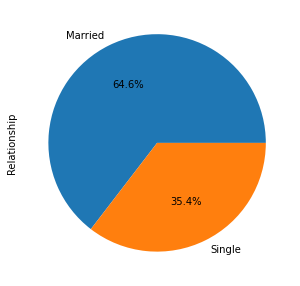

In [24]:
plt.figure(figsize= (10,7), facecolor='white') # set white background
mkt_df['Relationship'].value_counts().plot.pie(figsize=(7, 5), autopct='%.1f%%');

**2. Phân bố học vấn của khách hàng khảo sát**

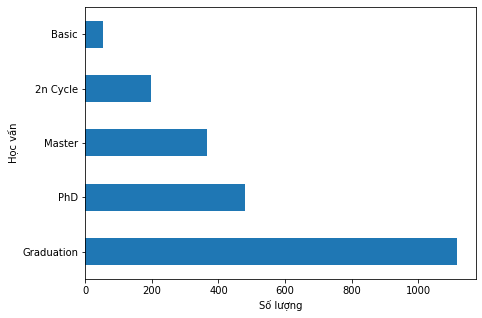

In [25]:
mkt_df['Education'].value_counts().plot.barh(figsize=(7, 5))
plt.xlabel("Số lượng")
plt.ylabel("Học vấn");

**3. Phân bố số con của khách hàng**

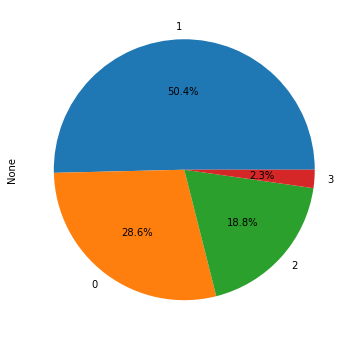

In [26]:
num_child = mkt_df['Kidhome'] + mkt_df['Teenhome']
num_child.value_counts().plot.pie(figsize=(8, 6), autopct='%.1f%%');

$\to$ Như vậy có khoảng 71.5% khách hàng có con, cũng khá nhiều...Ta sẽ tận dụng thông tin này sau

**4. Thống kê số lượt mua hàng qua các nền tảng**

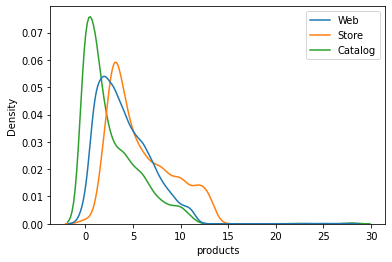

In [27]:
df = mkt_df[['Web', 'Store', 'Catalog']]
sns.kdeplot(data=df);
plt.xlabel('products');

- Nhận xét:
    - Số lượng mua hàng qua 3 hình thức: Store > Web > Catalog
    - Nhìn chung phần lớn đơn hàng có dưới 4 sản phẩm ở cả 3 hình thức 
    - Nhìn chung số mặt hàng trong 1 đơn hàng bất kỳ nằm trong khoảng [0, 15]

**5. Thống kê tỷ lệ khách hàng tham gia từng chiến dịch marketing**

<AxesSubplot:>

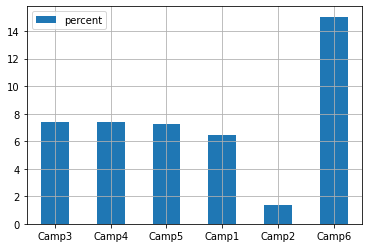

In [28]:
pct_cmp = mkt_df.filter(regex='(Camp)').sum() / mkt_df.shape[0] * 100
pct_cmp.to_frame(name='percent').plot.bar(rot=0, grid=True)

$\to$ Phần lớn khách hàng đồng ý mua hàng ở chiến dịch markting cuối cùng

**6. Phân bố tuổi như thế nào?**

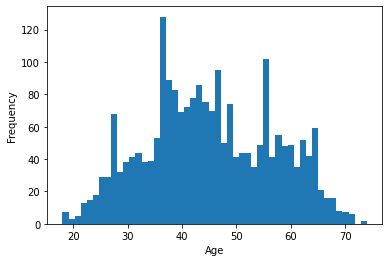

In [29]:
mkt_df['Age'].plot.hist(bins=50);
plt.xlabel('Age');

$\to$ Có vẻ khách hàng trong khoảng 35-50 tuổi chiếm phần lớn. Để dễ thống kê hơn, ta chia tuổi thành 4 nhóm tuổi:
Young: 0-30 tuổi, Mature: 30-45 tuổi, Middle-age: 45-65 tuổi, Old: >65 tuổi

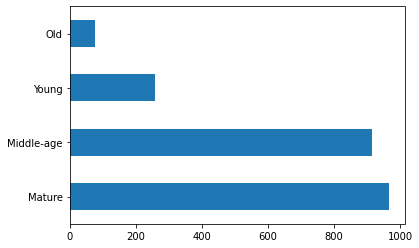

In [30]:
age_group = ['Young', 'Mature', 'Middle-age', 'Old']
age_range = [0, 30, 45, 65, 101] # từng cặp là từng nhóm tuổi. VD: [0-30] tuổi, [30-45] tuổi
age = pd.cut(mkt_df['Age'], bins=age_range, labels=age_group)
age.value_counts().plot.barh();

$\to$ Như vậy, nhóm tuổi trưởng thành (Mature) và trung niên (Middle-age) chiếm phần lớn. Trong mục tiếp theo, sẽ có phân tích riêng về 2 nhóm tuổi nổi bật này

**7. Phân bố thu nhập khách hàng như thế nào?**

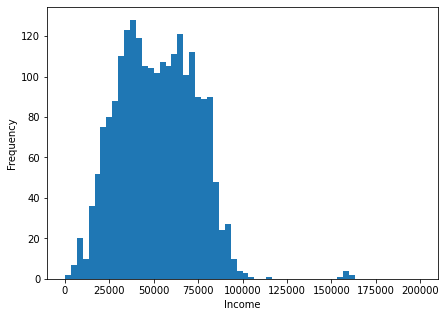

In [31]:
mkt_df['Income'].plot.hist(bins=60, range=(0,200000), figsize=(7,5))
plt.xlabel('Income');

$\to$ Như vậy phần lớn khách hàng có thu nhập nằm trong khoảng [0, 100K]

**9. Thống kê số tiền của khách đã bỏ ra cho 6 mặt hàng**

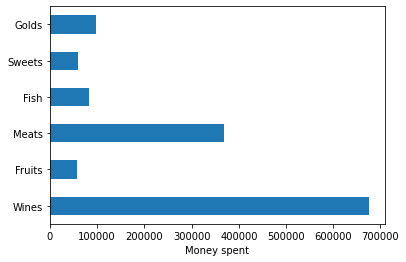

In [32]:
products = mkt_df[['Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Golds']]
products.sum().plot.barh()
plt.xlabel('Money spent');

$\to$ Có vẻ rượu (Wines) và thịt (Meats) là 2 sản phẩm được tiêu thụ nhiều. Tuy nhiên chưa đủ cơ sở chắc chắn điều này được vì mỗi sản phẩm có 1 giá tiền/1 sản phẩm khác nhau (VD: giá tiền trái cây hầu như luôn bé hơn giá tiền của chai rượu). Câu này không mang ý nghĩa nhiều ngoài việc coi thử có sản phẩm nào mua ít quá hay nhiều quá

## II. Các câu hỏi in-depth

Danh sách câu hỏi:

1. 
2. 

## 1. Ứng với mỗi sản phẩm công ty, phân khúc khách hàng nào sẽ mua sản phẩm đó nhiều nhất?
Lợi ích: Xác định được khách hàng mục tiêu cho từng sản phẩm. Từ đó marketing sản phẩm tương ứng tới phân khúc khách hàng đó để tối đa hóa số lượng sản phẩm bán ra. Từ đó tăng doanh thu cho công ty

**"phân khúc khách hàng"** sẽ được quyết định dựa trên:
- Nhân khẩu học: Tuổi (`Age`), thu nhập (`Income`), và học vấn (`Education`), Số lượng con cái (`NumChild`) và tình trạng hôn nhân (`Relationship`)
- Hành vi mua hàng: 
    - Tính cách mua hàng - tức khách có mua hàng ở lần marketing thứ i không (`AcceptedCmp`<font color='blue'>i</font> với <font color='blue'>i</font>=1..6) 
    - Nơi thực hiện mua hàng (`Web`, `NumCatalogPurchases` hay `NumStorePurchases`)

**"sản phẩm công ty"** chính là 6 sản phẩm hiện có trong tập dữ liệu: [`Wines`, `Fruits`, `Meats`, `Fish`, `Sweets`, `Golds`]

---

### Tiền xử lý
- Bước 1: tính số con của từng khách hàng và lưu vào cột `NumChild` $\to$ Tận dụng Series `num_child` ở mục I.3 thì coi như xong bước 1
- Bước 2: phân cột `Age` thành các nhóm: ['Young', 'Mature', 'Midlle-age', 'Old'] $\to$ Tận dụng Series `age` ở mục I.6 thì coi như xong bước 2
- Bước 3: phân cột `Income` thành 3 nhóm category: [Low, Low to medium, Medium, High] tương ứng với tứ phân vị trong cột `Income` 
- Bước 4: chuẩn bị dataframe `customer_seg` gồm các cột đã đề cập để chuẩn bị cho quá trình phân tích dữ liệu sắp tới

In [33]:
# Code bước 3
income_group = ['Low', 'Low to medium', 'Medium', 'High']
income = pd.qcut(mkt_df['Income'], q=4, labels=income_group)
# income = income

In [34]:
# Code bước 4
camp = [f'Camp{i}' for i in range(1,7)]
cols = ['Education', 'Web', 'Catalog', 'Store', 'Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Golds', 'Relationship'] + camp
customer_seg = mkt_df[cols].copy()

# add columns
customer_seg['Age'] = age # add cột Age
customer_seg['Income'] = income # add cột Income
customer_seg['NumChild'] = num_child # add cột NumChild

customer_seg.head()

,Education,Web,Catalog,Store,Wines,Fruits,Meats,Fish,Sweets,Golds,Relationship,Camp1,Camp2,Camp3,Camp4,Camp5,Camp6,Age,Income,NumChild
0,Graduation,8,10,4,635,88,546,172,88,88,Single,0,0,0,0,0,1,Middle-age,Medium,0
1,Graduation,1,1,2,11,1,6,2,1,6,Single,0,0,0,0,0,0,Middle-age,Low to medium,2
2,Graduation,8,2,10,426,49,127,111,21,42,Married,0,0,0,0,0,0,Middle-age,High,0
3,Graduation,2,0,4,11,4,20,10,3,5,Married,0,0,0,0,0,0,Young,Low,1
4,PhD,5,3,6,173,43,118,46,27,15,Married,0,0,0,0,0,0,Mature,Medium,1


### Phân tích: 
Dataframe `customer_seg` hiện đang lưu thông tin về 6 cột Products + 5 cột thông tin cá nhân + 9 cột hành vi mua hàng
- 6 cột sản phẩm: [`Wines`, `Fruits`, `Meats`, `Fish`, `Sweets`, `Golds`]
- 5 cột thông tin cá nhân: [`Age`, `Income`, `Education`, `NumChild`, `Relationship`]
- 9 cột hành vi mua hàng: [`Web`, `Catalog`, `Store`, `Camp1`, `Camp2`, ..., `Camp6`]

Ta phân tích ứng với từng sản phẩm thì phân khúc khách hàng của sản phẩm đó bao gồm những khách hàng có tính chất như thế nào? (VD: ứng với sản phẩm **Wines** thì những khách hàng có `Relationship=Single`,... có xu hướng mua nhiều hơn). Tóm tắt các bước làm (sẽ nói chi tiết ở từng bước)
- Bước 1: với mỗi sản phẩm, thống kê top các khách hàng chi nhiều tiền mua sản phẩm đó nhiều nhất, "nhiều nhất" được dựa trên phân vị 75% của từng cột sản phẩm và được lưu vào dataframe `top_customers`, tức là nếu 1 khách hàng có số lượng mua sản phẩm X thuộc vào phân vị này thì họ mua nhiều hơn 75% các khách hàng còn lại
- Bước 2 (dự đoán phân khúc khách hàng): với mỗi một top khách hàng tìm dược ở bước 1, tìm ra điểm chung **lớn nhất** của các khách hàng này về mặt **thông tin cá nhân** và **hành vi mua hàng**. Kết quả là 1 dataframe `cust_by_prod` gồm 6 cột tương ứng 6 sản phẩm và 14 dòng = 5 dòng **thông tin cá nhân** + 9 dòng **hành vi mua hàng**

#### Code bước 1
- Định nghĩa 1 hàm hợp `top_customers_ix(prod)` nhận vào prod là 1 cột Series sản phẩm, trả ra chỉ số index của top khách hàng chi nhiều tiền mua sản phẩm prod ("nhiều" trong khoảng phân vị [0.75, 1])
- Sau đó áp dụng hàm hợp này lên cho 6 cột products 

In [36]:
def top_customers_ix(prod): # ix = index
    major_buy_mnt = pd.qcut(prod, [.75, 1]) # lấy các record khách hàng có SL mua món hàng thuộc vào phân vị 75%
    cust_ix = major_buy_mnt[~major_buy_mnt.isna()].index # lấy index các dòng thỏa DK trên, cũng là index các khách hàng
    return cust_ix.to_list() # return danh sách index khách hàng

products = ['Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Golds']
top_customers = customer_seg[products].agg([top_customers_ix])
top_customers

,Wines,Fruits,Meats,Fish,Sweets,Golds
top_customers_ix,"[0, 5, 15, 18, 22, 29, 36, 49, 51, 53, 55, 60, 62, 63, 67, 69, 73, 76, 77, 79, 96, 103, 111, 112, 116, 124, 131, 135, 140, 141, 143, 145, 154, 155, 159, 161, 163, 175, 176, 182, 188, 196, 197, 202, 203, 209, 211, 217, 219, 222, 224, 227, 228, 231, 234, 240, 243, 244, 246, 247, 248, 249, 254, 256, 261, 270, 275, 279, 292, 295, 299, 301, 305, 307, 308, 313, 323, 325, 332, 336, 338, 342, 351, 353, 354, 357, 358, 360, 361, 368, 369, 373, 378, 387, 389, 390, 394, 395, 401, 412, ...]","[0, 2, 4, 5, 6, 12, 18, 29, 34, 40, 45, 49, 51, 53, 55, 56, 64, 68, 69, 70, 72, 76, 77, 88, 99, 102, 103, 104, 107, 109, 110, 113, 116, 117, 120, 125, 126, 130, 132, 140, 144, 168, 175, 176, 198, 201, 202, 209, 228, 231, 240, 241, 243, 247, 248, 252, 253, 257, 261, 266, 268, 270, 276, 277, 286, 288, 292, 305, 313, 317, 323, 335, 336, 338, 345, 347, 350, 351, 353, 357, 360, 368, 387, 390, 392, 394, 401, 403, 411, 413, 414, 418, 423, 424, 426, 432, 433, 436, 447, 451, ...]","[0, 12, 18, 21, 29, 34, 40, 45, 49, 51, 53, 55, 56, 60, 64, 67, 69, 70, 72, 76, 77, 84, 88, 98, 103, 104, 107, 110, 111, 116, 126, 135, 140, 141, 142, 155, 159, 161, 163, 164, 168, 175, 179, 188, 191, 197, 198, 201, 202, 209, 211, 214, 217, 221, 228, 234, 240, 241, 243, 246, 248, 252, 254, 266, 268, 270, 277, 278, 287, 288, 292, 298, 307, 313, 323, 325, 335, 336, 338, 340, 347, 350, 351, 352, 353, 357, 360, 366, 368, 373, 390, 392, 395, 414, 415, 417, 424, 426, 427, 430, ...]","[0, 2, 6, 12, 15, 17, 20, 34, 39, 40, 45, 49, 53, 55, 56, 60, 64, 67, 69, 70, 72, 76, 77, 88, 98, 99, 102, 103, 104, 107, 116, 117, 126, 130, 140, 144, 159, 166, 168, 175, 176, 179, 188, 191, 198, 201, 203, 210, 214, 221, 228, 231, 240, 241, 243, 246, 247, 248, 249, 266, 268, 270, 276, 277, 282, 286, 287, 288, 292, 298, 305, 313, 317, 323, 335, 336, 340, 345, 347, 351, 353, 357, 358, 360, 366, 368, 382, 392, 395, 401, 411, 413, 415, 417, 418, 424, 426, 429, 432, 447, ...]","[0, 5, 6, 12, 15, 20, 29, 34, 39, 40, 49, 50, 51, 53, 55, 56, 64, 68, 70, 72, 77, 84, 88, 99, 102, 103, 107, 110, 111, 116, 117, 120, 124, 130, 132, 135, 140, 142, 143, 145, 159, 168, 175, 176, 188, 191, 197, 198, 202, 203, 211, 214, 217, 228, 231, 237, 240, 241, 248, 249, 252, 254, 266, 268, 270, 276, 278, 286, 287, 288, 298, 305, 307, 313, 325, 335, 336, 340, 345, 347, 350, 351, 357, 360, 366, 368, 382, 387, 390, 392, 399, 401, 411, 413, 418, 423, 426, 427, 429, 432, ...]","[0, 18, 24, 31, 40, 45, 53, 54, 55, 60, 62, 68, 69, 72, 83, 84, 88, 96, 98, 102, 103, 107, 110, 111, 112, 114, 117, 124, 125, 126, 130, 132, 142, 144, 152, 154, 159, 168, 176, 179, 182, 187, 191, 198, 199, 201, 203, 209, 215, 218, 224, 226, 227, 243, 244, 246, 247, 248, 249, 252, 266, 267, 268, 270, 276, 279, 281, 283, 286, 287, 292, 305, 320, 323, 325, 335, 338, 345, 347, 351, 360, 364, 365, 368, 373, 378, 386, 387, 389, 390, 392, 394, 403, 414, 418, 423, 427, 429, 431, 432, ...]"


#### Code bước 2
"điểm chung **lớn nhất**" của 1 cột Series bất kỳ là những giá trị có tần số xuất hiện trong cột đó thuộc phân vị 51% - tức xuất hiện nhiều hơn 1 nửa

Để code được bước 2, ta sẽ thử nghiệm với 1 cột `Wines` trước để biết được output có hình dáng ra sao. Sau đó mới tính toán và áp dụng cho 6 cột products

a) Thử nghiệm với cột `Wines`

Đầu tiên, định nghĩa hàm hợp `most_freq_val(s)` có chức năng tìm thông tin chung lớn nhất của cột s. Hàm này dùng để áp lên các cột ngoại trừ 6 cột sản phẩm. 

**Cách hoạt động**: Hàm nhận vào 1 Series `s`, tính tần số xuất hiện của từng <font color=green>**unique value của `s`**</font> (sử dụng value_counts()) và tìm ra những <font color=green>**value**</font> có tần số xuất hiện thuộc phân vị 51%.\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<u>VD</u>: Xét thuộc tính `Relationship` có <font color=green>**unique value**</font> = ['Married', 'Single'] với tần số xuất hiện lần lượt là [400, 100], thấy rằng trong khoảng phân vị 51% chỉ có <font color=green>**value**</font> = 'Married' thỏa nên hàm sẽ trả về ['Married']

In [37]:
def most_freq_val(s):
    # lọc ra unique value của cột s có tần số xuất hiện nhiều trong khoảng phân vị [0.51, 1].
    # Kết quả: Series có Series.index là unique value của cột s và 
    ## Series.value là NaN (nếu tần số không thuộc [0.51, 1]) hoặc khác NaN
    top_vals = pd.qcut(s.value_counts(), [0.51, 1]) 
    
    # lọc ra index của value xuất hiện nhiều (tức khác NaN)
    # Kết quả: là 1 mảng bool
    top_vals_ix = ~top_vals.isna()
    
    # tìm ra được điểm chung lớn nhất
    top_vals = top_vals[top_vals_ix].index.to_list()
    return top_vals

Tiếp theo:
- Lọc ra index nhóm khách hàng của sản phẩm `Wines` từ dataframe `top_customers` và lưu những index này vào biến `cust_ix`
- Từ index, lấy được cột thông tin cá nhân + thông tin hành vi của nhóm khách hàng này và lưu vào biến `cust`
- Áp dụng hàm hợp lên từng cột thông tin khách hàng của `cust` để biết phần lớn nhóm khách chi nhiều tiền cho `Wines` sẽ có đặc điểm là gì

In [38]:
cust_ix = top_customers.loc['top_customers_ix', 'Wines'] # lọc ra index nhóm khách hàng của Wines
cust = customer_seg.loc[cust_ix, ~customer_seg.columns.isin(products)] # lấy thông tin cá nhân + thông tin hành vi của nhóm này
cust_of_wines = cust.agg([most_freq_val]).iloc[0] # Kết quả là dataframe 1 dòng nên lấy dòng đầu là đủ
cust_of_wines

Education          [Graduation, PhD]
Web                  [5, 4, 6, 7, 3]
Catalog              [4, 6, 3, 5, 2]
Store              [10, 5, 8, 9, 12]
Relationship               [Married]
Camp1                            [0]
Camp2                            [0]
Camp3                            [0]
Camp4                            [0]
Camp5                            [0]
Camp6                            [0]
Age             [Middle-age, Mature]
Income                [High, Medium]
NumChild                      [0, 1]
Name: most_freq_val, dtype: object

Như vậy, với 1 cột `Wines`, ta biết được rằng phần lớn khách hàng có các đặc điểm như: đã tốt nghiệp, độ tuổi tầm trưởng thành (Mature) hoặc trung niên (Middle-age), thu nhập khá trở lên, ....Bây giờ ta đã sẵn sàng để mở rộng làm cho cả 6 cột sản phẩm

b) Làm trực tiếp trên 6 cột products của `top_customers`

- Định nghĩa hàm hợp `feature(prod)` với `prod` là cột Series sản phẩm trong `top_customers`. Công việc của hàm này giống y hệt cell code ngay phía trên, chỉ đổi tên biến và thay vì làm cho 1 cột thì sẽ làm cho cột `prod` bất kỳ

In [39]:
def feature(prod):
    cust_ix = top_customers.loc['top_customers_ix', prod.name] # lọc ra index nhóm khách hàng của prod
    cust = customer_seg.loc[cust_ix, ~customer_seg.columns.isin(products)] # lấy thông tin cá nhân + thông tin hành vi của nhóm này
    cust_of_prod = cust.agg([most_freq_val]).iloc[0] # Kết quả là dataframe 1 dòng nên lấy dòng đầu là đủ
    return cust_of_prod # kết quả là Series như cell code ngay trên

final_cust_segmentation = top_customers.agg([feature])
final_cust_segmentation

,Wines,Fruits,Meats,Fish,Sweets,Golds
,feature,feature,feature,feature,feature,feature
Education,"[Graduation, PhD]","[Graduation, PhD]","[Graduation, PhD]","[Graduation, PhD]","[Graduation, PhD]","[Graduation, Master]"
Web,"[5, 4, 6, 7, 3]","[4, 5, 3, 6, 7]","[4, 5, 3, 6, 7, 8]","[4, 5, 3, 6, 7]","[4, 5, 6, 3, 7, 8]","[5, 4, 6, 7, 3, 8]"
Catalog,"[4, 6, 3, 5, 2]","[4, 2, 6, 3, 5, 7]","[6, 5, 4, 7, 3, 10]","[4, 3, 6, 5, 2, 7]","[4, 6, 5, 3, 2, 7]","[2, 3, 4, 5, 6, 1]"
Store,"[10, 5, 8, 9, 12]","[10, 8, 6, 7, 12]","[6, 10, 5, 12, 7, 8, 9]","[5, 6, 10, 8, 12]","[10, 8, 6, 5, 7, 13]","[5, 8, 6, 12, 7, 9, 10]"
Relationship,[Married],[Married],[Married],[Married],[Married],[Married]
Camp1,[0],[0],[0],[0],[0],[0]
Camp2,[0],[0],[0],[0],[0],[0]
Camp3,[0],[0],[0],[0],[0],[0]
Camp4,[0],[0],[0],[0],[0],[0]


Vì output còn "hơi xấu" do:

- `final_cust_segmentation.columns` có 2 level:
    - level=0: Wines, Fruits, Meats, Fish, Sweets, Golds
    - level=1: feature, feature, feature, feature, feature, feature 

$\to$ Bỏ đi level=1 để nhìn đẹp và gọn hơn (sử dụng `DataFrame.droplevel`) 
  
- 3 cột `Web`, `Catalog`, `Store` có thể hiện dạng list khó nhìn và khó thống kê  

$\to$ Lấy mean mỗi cột 

In [40]:
final_cust_segmentation = final_cust_segmentation.droplevel(level=1, axis=1)
final_cust_segmentation.loc[['Web', 'Catalog', 'Store']] = final_cust_segmentation.loc[['Web', 'Catalog', 'Store']].applymap(lambda lst: np.mean(lst).round())
final_cust_segmentation

,Wines,Fruits,Meats,Fish,Sweets,Golds
Education,"[Graduation, PhD]","[Graduation, PhD]","[Graduation, PhD]","[Graduation, PhD]","[Graduation, PhD]","[Graduation, Master]"
Web,5.0,5.0,6.0,5.0,6.0,6.0
Catalog,4.0,4.0,6.0,4.0,4.0,4.0
Store,9.0,9.0,8.0,8.0,8.0,8.0
Relationship,[Married],[Married],[Married],[Married],[Married],[Married]
Camp1,[0],[0],[0],[0],[0],[0]
Camp2,[0],[0],[0],[0],[0],[0]
Camp3,[0],[0],[0],[0],[0],[0]
Camp4,[0],[0],[0],[0],[0],[0]
Camp5,[0],[0],[0],[0],[0],[0]


Như vậy, có thể bắt đầu rút trích insights từ đây

1. Đặc điểm chung của những người hay chi nhiều tiền cho 1 trong 6 sản phẩm này là: (tốt nghiệp bậc đại học trở lên), (hay mua hàng tại cửa hàng), (đã cưới), (người trưởng thành hoặc trung niên), (đạt lương vừa/cao), (không có hoặc có 1 con) và (không cần thông qua các chiến dịch marketing mới mua hàng - `AcceptedCmp`**i**)


2. Các khách hàng này phần lớn vẫn ưa chuộng việc mua sắm trực tiếp tại cửa hàng $\to$ Cần duy trì, nâng cấp các chi nhánh cửa hàng của công ty 


3. Với nền tảng Web công ty, lượng người mua nhìn chung khá tốt. Riêng với thịt (Meats), đồ ngọt (Sweets) và vàng (Golds) được khách hàng mua online nhiều hơn các món khác $\to$ Đây có thể là 3 món hàng tiềm năng nên cần tăng số lượng 3 mặt hàng này nhưng vẫn đảm bảo chất lượng và có thể kèm theo khuyến mãi để lôi kéo nhiều khách hàng hơn. Với 3 mặt hàng còn lại, khách hàng cũng ưa chuộng không kém nên ta có thể tăng cường các hình thức khuyến mãi hoặc marketing các mặt hàng này nhiều hơn nữa


4. Khách hàng có xu hướng mua nhiều thịt hơn các mặt hàng còn lại thông qua các ấn phẩm/danh mục quảng cáo (Catalog) 

## 2. Hành vi mua hàng của những khách hàng có con và không con?

Lợi ích: nắm được việc hành vi mua hàng của mỗi khách hàng có con, ta sẽ biết những ông bố/bà mẹ hoặc khách hàng không có con ưu tiên mua gì cho gia đình hoặc cho riêng họ

Lý do khảo sát nhóm khách hàng này: Như ta đã biết mục I.3, có 71.5% khách hàng có con - chiếm hơn 2/3 số lượng khách hàng. Như vậy là đủ để ta tò mò về thông tin cá nhân và hành vi mua của nhóm khách hàng này. Và không chỉ quan tâm tới những khách hàng có con, công ty cũng nên quan tâm tới hành vi mua hàng ở những người không có con để đưa ra 1 số chiến lược phù hợp cho cả 2 đối tượng này

Các bước phân tích:
- Bước 1: Lọc ra dataframe `customers` gồm tất cả khách hàng cùng số con của họ
- Bước 2: Như đã biết ở mục I, số con của 1 người dao động từ 0 tới 3 con, như vậy sẽ có 4 nhóm khách hàng. Với mỗi nhóm, thống kê tổng số tiền đã bỏ ra cho mỗi sản phẩm của công ty và lưu bảng thống kê này vào dataframe `deals`
- Bước 3: Trực quan hóa thống kê ở bước 2 

Code bước 1

In [41]:
customers = mkt_df.drop(columns=['Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain', 'ID'])
customers['NumChild'] = num_child # thêm cột num_child
customers.head()

,Education,Relationship,Income,Wines,Fruits,Meats,Fish,Sweets,Golds,DiscountDeals,Web,Catalog,Store,WebVisit,Camp3,Camp4,Camp5,Camp1,Camp2,Camp6,Age,NumChild
0,Graduation,Single,58138.0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,57,0
1,Graduation,Single,46344.0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,60,2
2,Graduation,Married,71613.0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,49,0
3,Graduation,Married,26646.0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,30,1
4,PhD,Married,58293.0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,33,1


Code bước 2

In [42]:
deals = customers.groupby('NumChild')[['Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Golds']].sum()
deals

,Wines,Fruits,Meats,Fish,Sweets,Golds
NumChild,,,,,,
0,308195,32946,234196,48396,33599,40437
1,299910,21741,110807,29929,22519,45247
2,59133,3269,21504,4694,3456,10586
3,8067,299,2981,268,254,906


Code bước 3: Ta muốn output là 3 biểu đồ tương ứng với 3 nhóm con. `catplot()` của thư viện seaborn giúp ta làm điều đó

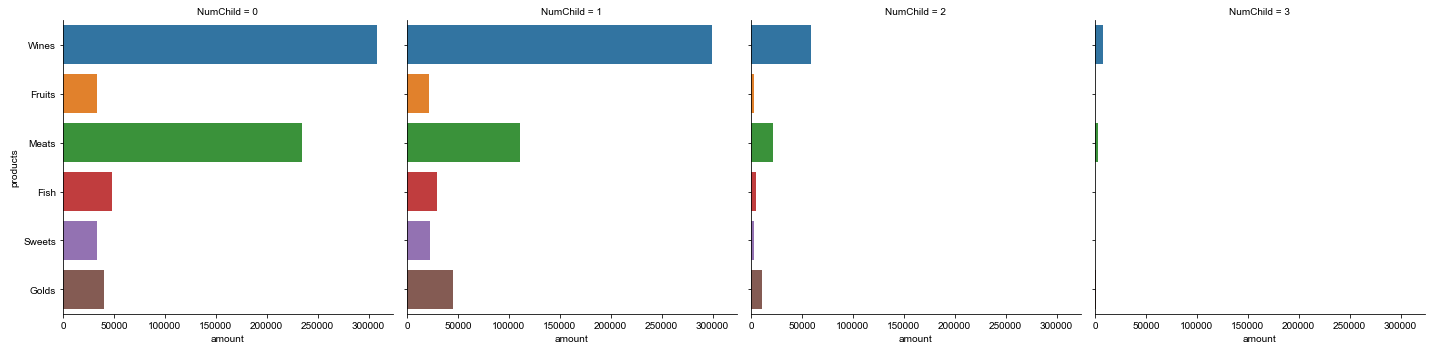

In [43]:
df = pd.melt(deals.reset_index(), id_vars='NumChild', var_name= 'products', value_name='amount')
sns.catplot(x="amount", y="products", col="NumChild", data=df, kind="bar");
sns.set_theme(style="darkgrid")

Nhận xét: Nhìn chung rượu vẫn là sản phẩm có tổng giá trị tiêu thụ cao ở tất cả các khách hàng. Thịt vẫn là ưu tiên thứ 2 ở tất cả khách hàng; thứ 3 là vàng (Gold) hoặc cá (Fish). Các sản phẩm còn lại tiêu thụ 1 lượng không đáng kể so với các sản phẩm khác trong cùng nhóm con

### Câu hỏi kéo theo 1: Khách hàng có con thường chấp nhận offer vào lần marketing thứ mấy (So sánh với nhóm không có con xem thế nào)

Lợi ích: Khi biết được kích thước gia đình của từng khách hàng và cách họ mua hàng thông qua các chiến dịch marketing, công ty sẽ biết lần marketing nào thì nên đầu tư nhân lực về marketing và trưng bày nhiều sản phẩm như Wines và Meats chiến dịch đó

Đầu tiên, xét các khách hàng có con: 
- Bước 1: chuẩn bị dataframe `parent_camp` với các 6 cột chiến dịch `camp`
- Bước 2: với mỗi (cột) chiến dịch marketing, tính tổng cột đó

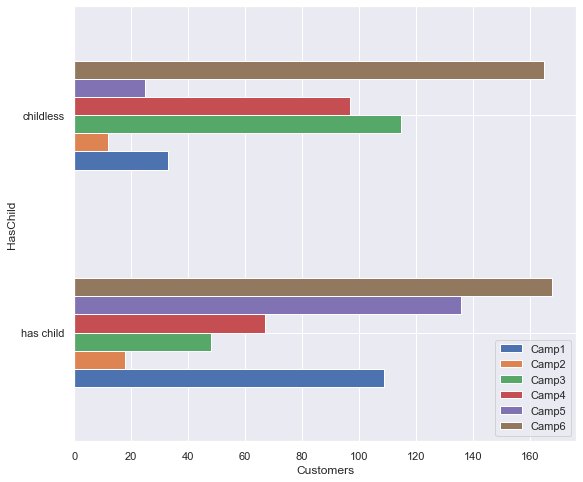

In [44]:
customers['HasChild'] = customers['NumChild'] > 0
customers.groupby('HasChild')[camp].sum().plot.barh(rot=0, grid=True, figsize=(9,8))
plt.xlabel('Customers');
plt.yticks(range(2), ['has child', 'childless']);

Nhận xét:
1. Ở các khách hàng có con, có vẻ họ dễ bị thuyết phục bởi các chiến dịch marketing lần 1,5,6
2. Ở các khách hàng không có con, có vẻ như mãi tới lần marketing thứ 3,4,6 thì họ mới chấp nhận offer mua hàng

## 3. Phân bố số lượn đơn mua từ trước tới gần cuối năm 2014 như thế nào?

Lợi ích: nắm rõ được là công ty đang sa sút hay bình ổn, có dấu hiệu suy giảm nhiều không, hay có nhiều đơn hàng hơn thì đồng nghĩa với việc thu về lợi nhuận nhiều hơn

Các bước phân tích:
- Bước 1: tính tổng số đơn mua qua `Web`, `Catalog`, `Store` và `DiscountDeals`, lưu vào biến `total_buy`
- Bước 2: Trực quan hóa

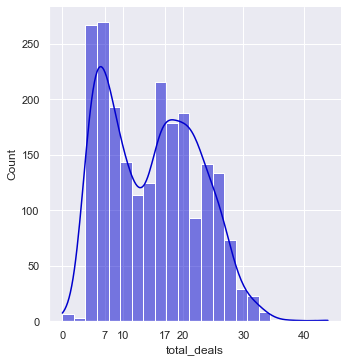

In [45]:
total_buy = mkt_df['Web'] + mkt_df['Catalog'] + mkt_df['Store'] + mkt_df['DiscountDeals'] 

# tìm x mà tại đó y đạt max
freq = total_buy.value_counts()
peek_1 = freq[freq.index.isin(range(1,11))].idxmax()
peek_2 = freq[freq.index.isin(range(15,20))].idxmax()

g = sns.displot(total_buy,color = 'mediumblue', kde=True);
plt.xticks([0, peek_1, 10, peek_2, 20, 30, 40]);
plt.xlabel('total_deals');

$\to$ Đồ thị có 2 đỉnh tại x=7 và x=17. Có vẻ như số khách hàng có khoảng 7 đơn và 17 đơn (có chênh lệch sang 2 bên) khá phổ biến từ ngày có được dataset này tới khoảng cuối năm 2014. Như vậy thì cũng không phải quá nhiều hay quá ít, nhìn chung công ty vẫn bán tốt các sản phẩm của mình

## 4. Với nhóm khách hàng mua hàng ít hơn trung bình, có điều gì ở họ mà làm cho việc mua sản phẩm ở công ty thấp thế?
Lợi ích: khi biết được tình hình mua hàng nhóm này, ta sẽ đề ra 1 số giải pháp hay chính sách, ví dụ như giảm giá, để hỗ trợ khách hàng có cơ hội mua được nhiều mặt hàng công ty hơn. Thêm vào đó khách hàng nhóm này sẽ cảm thấy được chăm sóc và trân trọng -> có khả năng gắn bó lâu dài với công ty hơn

Ta sẽ tìm hiểu xem có đặc điểm gì (VD: thu nhập, tình trạng hôn nhân,...) mà khiến khách hàng ít mua mua hàng tới vậy

**"khách hàng mua hàng ít hơn trung bình"** = tổng số đơn hàng (dataframe `total_buy` phía trên) của khách hàng nằm trong khoảng phân vị [0, 25%]

### Tiền xử lý:
- Bước 1: chuẩn bị dataframe `minor_customer` với các cột đã có trong `mkt_df` và thêm cột `NumChild`, ngoài ra ta cũng sửa lại cột `Income` để giá trị cột này được rời rạc hóa thành từng nhóm lương
- Bước 2: lọc ra các khách hàng có số đơn ít trong phân vị [0, 25%]

In [46]:
# Code bước 1
minor_customer = mkt_df.copy()
minor_customer['Income'] =  income
minor_customer['Age'] = age
minor_customer['NumChild'] = num_child

# Code bước 2
minor_customer_ix = ~pd.qcut(total_buy, [0, 0.25]).isna()
minor_customer = minor_customer.loc[minor_customer_ix]
minor_customer.shape

(640, 28)

### Phân tích 

**1. Tuổi của nhóm khách hàng này phần lớn là nhóm tuổi nào?**

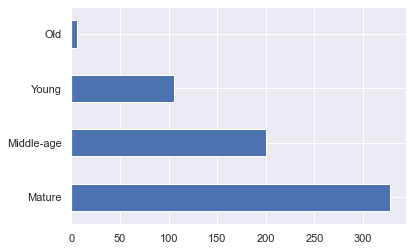

In [47]:
minor_customer['Age'].value_counts().plot.barh();

$\to$ Các dối tượng khách hàng cần sự hỗ trợ (nếu có): khách hàng thuộc độ tuổi **trẻ**, **trưởng thành** và **trung niên**   

**2. Xét lương của khách hàng thuộc 3 nhóm tuổi này, xem thử cao hay thấp**

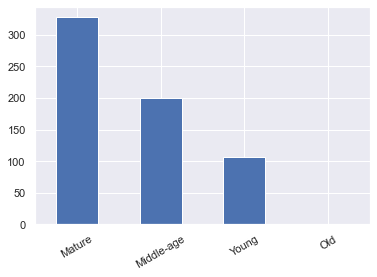

In [48]:
minor_customer = minor_customer.loc[minor_customer['Age'] != 'Old']
minor_customer['Age'].value_counts().plot.bar(rot=30);

$\to$ Đa phần khách hàng thuộc nhóm có lương **dưới mức Medium**. Tiếp tục xem trong quá khứ, họ chi bao nhiêu để mua từng sản phẩm công ty

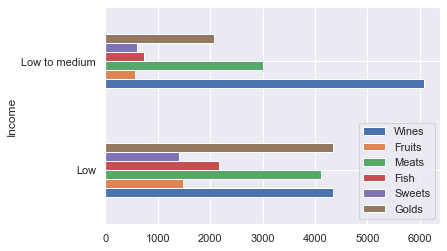

In [49]:
poor_customer = minor_customer.loc[minor_customer['Income'].isin(['Low', 'Low to medium'])]
poor_customer.groupby('Income')[products].sum().iloc[:2].plot.barh(); # lấy [:2] để bỏ income=[medium, high]

Nhận xét:
1. Cả 2 nhóm đều chi nhiều tiền cho 2 mặt hàng: rượu (Wines) và thịt (Meats) 
2. Riêng nhóm có lương thấp (Low) chi nhiều tiền để mua nhiều vàng hơn. Nhóm này cũng không bị lệch nhiều trong việc chi tiền cho các mòn hàng

**3. Trong quá khứ, những khách hàng này hay chấp nhận offer ở lần marketing thứ mấy?**

<AxesSubplot:>

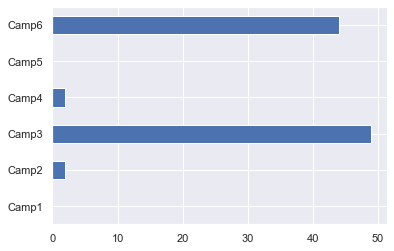

In [50]:
poor_customer[camp].sum().plot.barh()

$\to$ Chiến dịch thứ 3 và 6 thu hút được nhiều khách hàng nhất. 

**Tổng kết lại**: Cần có 1 số chương trình khuyến mãi,... tạo điều kiện cho những người thuộc nhóm tuổi trưởng thành - trung niên, lương dưới mức khá để giúp đỡ họ. Ngoài ra có thể cho họ những offer tốt vào lần marketing thứ 3 hoặc thứ 6

## Lượng tiêu thụ 6 sản phẩm của khách hàng từ 30/7/2012 - 29/6/2014 như thế nào?

**Lợi ích**: quan sát được tình hình bán 6 sản phẩm đang trên đà tăng hay giảm, từ đó tìm hiểu nguyên nhân và đưa ra chiến lược phù hợp

### Tiền xử lý
Như ở phần mô tả tóm tắt về dữ liệu, thuộc tính `Dt_Customer` có giá trị bé nhất là 30/7/2012 và lớn nhất là 29/6/2014, như vậy có thể chia thành 2 năm: 30/7/2012 - 30/7/2013 và 1/8/2013 - 29/6/2014 
- Bước 1: Xây dựng hàm `discretize_date(s)` dùng để phân ngày trong cột `Dt_Customer` vào 1 trong 4 nhóm: 'nửa đầu năm 1', 'nửa cuối năm 1', 'nửa đầu năm 2','nửa cuối năm 2'
- Bước 2: tạo 1 dataframe mới `df` để không làm thay đổi dataframe cũ là `mkt_df`, sau đó áp dụng hàm `discretize_date` lên cột `Dt_Customer` của df

- Code bước 1

In [159]:
# Code bước 1
def discretize_date(s):
    if s < pd.Timestamp('2013-01-31'): # 30/7/2012 - 31/1/2013
        return 'nửa đầu năm 1'
    elif s < pd.Timestamp('2013-07-30'): # 1/2/2013 - 30/7/2013
        return 'nửa cuối năm 1'
    elif s < pd.Timestamp('2014-01-31'): # 1/8/2013 - 31/1/2014
        return 'nửa đầu năm 2'
    else: # 1/2/2014 - 29/6/2014
        return 'nửa cuối năm 2'

- Code bước 2

In [187]:
df = mkt_df.copy()
df['Dt_Customer'] = df['Dt_Customer'].apply(discretize_date)
df['Dt_Customer'] # test

0        nửa đầu năm 1
1       nửa cuối năm 2
2        nửa đầu năm 2
3       nửa cuối năm 2
4        nửa đầu năm 2
             ...      
2235    nửa cuối năm 1
2236    nửa cuối năm 2
2237     nửa đầu năm 2
2238     nửa đầu năm 2
2239     nửa đầu năm 1
Name: Dt_Customer, Length: 2213, dtype: object

### Phân tích
- Bước 1: groupby cột `Dt_Customer` theo từng nhãn năm như đã nêu ở tiền xử lý và với mỗi cột sản phẩm (**products**), tính tổng cột đó để có được tổng tiêu thụ của từng sản phẩm 
- Bước 2: vẽ biểu đồ đường để thấy sự thay đổi trong lượng tiêu thụ của từng loại sản phẩm

<AxesSubplot:xlabel='Thời gian', ylabel='Tổng tiêu thụ ($)'>

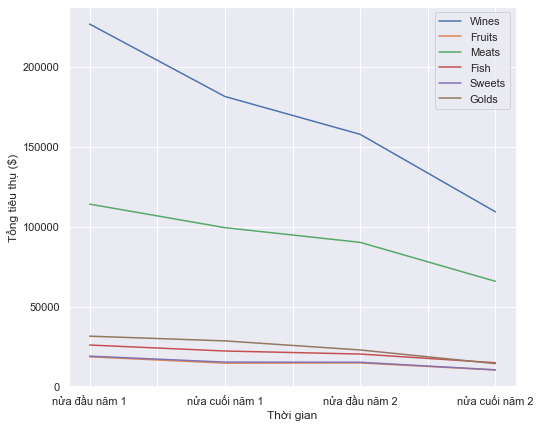

In [186]:
# Bước 1
df = df.groupby('Dt_Customer')[products].sum().reindex(['nửa đầu năm 1', 'nửa cuối năm 1', 'nửa đầu năm 2', 'nửa cuối năm 2'])
# Bước 2
df.plot.line(figsize=(8,7), ylabel='Tổng tiêu thụ ($)', xlabel='Thời gian')

Nhận xét:
- Nhìn chung các mặt hàng đều có lượng tiêu thụ giảm trong gần 2 năm liên tiếp, riêng lượng tiêu thụ rượu (Wines) giảm gần gấp đôi ở nửa cuối năm 2 và lượng tiêu thụ thịt (Meats) cũng giảm kha khá
- 3 sản phẩm còn lại giảm nhẹ và từ từ 